In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)

In [53]:
df = pd.read_csv('train.csv')

In [54]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [55]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [56]:
df['Group'] = pd.to_numeric(df['PassengerId'].apply(lambda x: x.split('_')[0]))
df['Number'] = df['PassengerId'].apply(lambda x: x.split('_')[1])

df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')


df['CabinDeck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notna(x) else x)
df['CabinNum'] = pd.to_numeric(df['Cabin'].apply(lambda x: x.split('/')[1] if pd.notna(x) else x))
df['CabinSide'] = df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notna(x) else x)

df.drop('Cabin', axis = 1, inplace=True)

df['Surname'] = df['Name'].apply(lambda x: x.split(' ')[1] if pd.notna(x) else x)
df['Name'] = df['Name'].apply(lambda x: x.split(' ')[0] if pd.notna(x) else x)

df['FamilySize'] = df.groupby('Surname')['PassengerId'].transform('count')
df['FamilySize'] = df['FamilySize'].fillna(1)
df['TravelAlone'] = df['FamilySize'] == 1

In [57]:
df['HomePlanet'] = df['HomePlanet'].fillna('Earth')
df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
df['VIP'] = df['VIP'].fillna(False)
df['CabinDeck'] = df['CabinDeck'].fillna('F')
df['CabinSide'] = df['CabinSide'].fillna('S')

In [58]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mode()[0])
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mode()[0])
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mode()[0])
df['Spa'] = df['Spa'].fillna(df['Spa'].mode()[0])
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mode()[0])

In [59]:
df['LogRoomService'] = np.log1p(df['RoomService'])
df['LogFoodCourt'] = np.log1p(df['FoodCourt'])
df['LogShoppingMall'] = np.log1p(df['ShoppingMall'])
df['LogSpa'] = np.log1p(df['Spa'])
df['LogVRDeck'] = np.log1p(df['VRDeck'])

In [60]:
df['GroupGroups'] = df['Group'].apply(lambda x: 0 if x < 3500 else 1 if x < 7500 else 2)
df['CabinNumGroups'] = df['CabinNum'].apply(lambda x: 0 if x < 312 else 1 if x < 687 else 2 if x < 1187 else 3)

In [61]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupSize,CabinNum,FamilySize,LogRoomService,LogFoodCourt,LogShoppingMall,LogSpa,LogVRDeck,GroupGroups,CabinNumGroups
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8494.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820,4633.389624,2.035546,600.367671,5.326240,1.735295,1.906543,1.599415,1.838851,1.757950,0.814333,1.164500
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417,2671.028856,1.596347,511.867226,2.934528,2.719285,2.932951,2.567446,2.769368,2.746810,0.728767,1.171783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000,167.250000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000,427.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,6883.000000,3.000000,999.000000,7.000000,3.737670,4.127134,3.135494,3.988984,3.713572,1.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,1894.000000,18.000000,9.569971,10.302733,10.064458,10.017218,10.091377,2.000000,3.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8693 non-null   object 
 2   CryoSleep        8693 non-null   bool   
 3   Destination      8693 non-null   object 
 4   Age              8693 non-null   float64
 5   VIP              8693 non-null   bool   
 6   RoomService      8693 non-null   float64
 7   FoodCourt        8693 non-null   float64
 8   ShoppingMall     8693 non-null   float64
 9   Spa              8693 non-null   float64
 10  VRDeck           8693 non-null   float64
 11  Name             8493 non-null   object 
 12  Transported      8693 non-null   bool   
 13  Group            8693 non-null   int64  
 14  Number           8693 non-null   object 
 15  GroupSize        8693 non-null   int64  
 16  CabinDeck        8693 non-null   object 
 17  CabinNum      

In [63]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,GroupSize,CabinDeck,CabinNum,CabinSide,Surname,FamilySize,TravelAlone,LogRoomService,LogFoodCourt,LogShoppingMall,LogSpa,LogVRDeck,GroupGroups,CabinNumGroups
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,1,01,1,B,0.0,P,Ofracculy,1.0,True,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,2,01,1,F,0.0,S,Vines,4.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,0,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,3,01,2,A,0.0,S,Susent,6.0,False,3.784190,8.182280,0.000000,8.812248,3.912023,0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,3,02,2,A,0.0,S,Susent,6.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,4,01,1,F,1.0,S,Santantines,6.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior,False,9276,01,1,A,98.0,P,Noxnuther,3.0,False,0.000000,8.827615,0.000000,7.404888,4.317488,2,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta,False,9278,01,1,G,1499.0,S,Mondalley,2.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,2,3
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey,True,9279,01,1,G,1500.0,S,Connon,6.0,False,0.000000,0.000000,7.535297,0.693147,0.000000,2,3
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon,False,9280,01,2,E,608.0,S,Hontichre,6.0,False,0.000000,6.956545,0.000000,5.869297,8.082093,2,1


In [64]:
df.nunique()

PassengerId        8693
HomePlanet            3
CryoSleep             2
Destination           3
Age                  80
VIP                   2
RoomService        1273
FoodCourt          1507
ShoppingMall       1115
Spa                1327
VRDeck             1306
Name               2706
Transported           2
Group              6217
Number                8
GroupSize             8
CabinDeck             8
CabinNum           1817
CabinSide             2
Surname            2217
FamilySize           17
TravelAlone           2
LogRoomService     1273
LogFoodCourt       1507
LogShoppingMall    1115
LogSpa             1327
LogVRDeck          1306
GroupGroups           3
CabinNumGroups        4
dtype: int64

In [65]:
def draw_countplot(column):
    sns.set_style("whitegrid")
    pastel_palette = sns.color_palette("pastel")

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=column, hue='Transported', palette=pastel_palette)
    plt.xlabel(column)
    plt.ylabel('Liczba wystąpień')
    plt.title(f'Rozkład kategorii w kolumnie {column} z podziałem czy transportowano')
    plt.xticks(rotation=45)
    plt.legend(title='Transported')

    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=column, palette=pastel_palette)
    plt.xlabel(column)
    plt.ylabel('Liczba wystąpień')
    plt.title(f'Rozkład kategorii w kolumnie {column}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [66]:
def draw_hist(column):
    sns.set_style("whitegrid")

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, hue='Transported', kde=True)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f'Histogram kolumny {column} z podziałem czy transportowano')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f'Histogram kolumny {column}')

    plt.show()

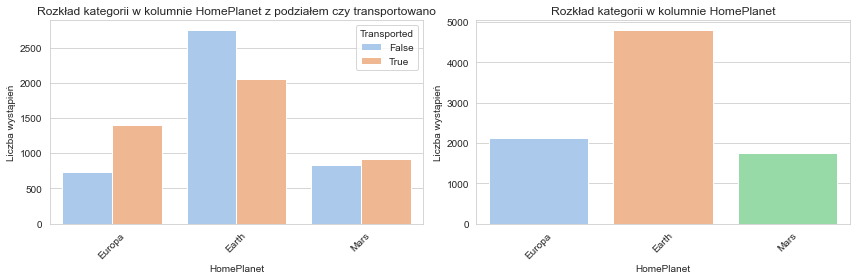

In [67]:
draw_countplot('HomePlanet')

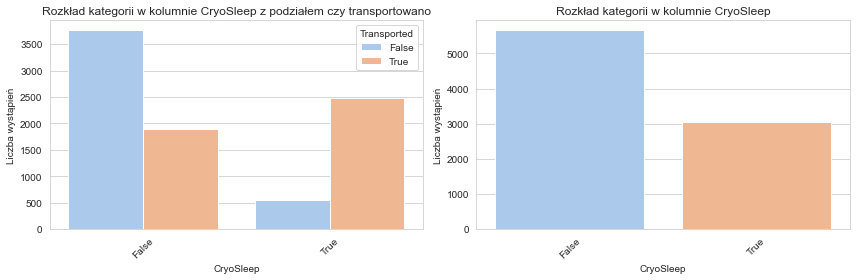

In [68]:
draw_countplot('CryoSleep')

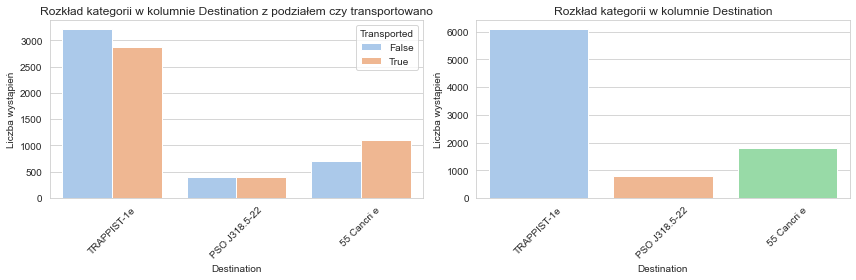

In [69]:
draw_countplot('Destination')

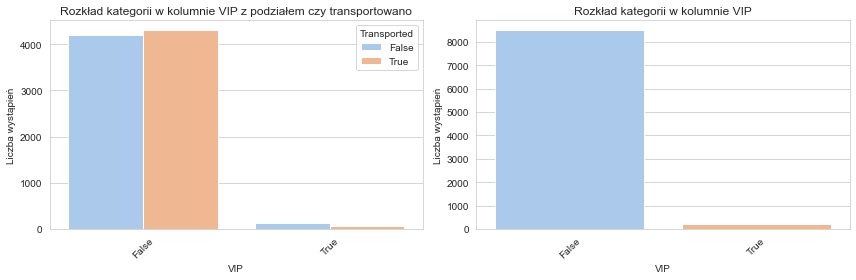

In [70]:
draw_countplot('VIP')

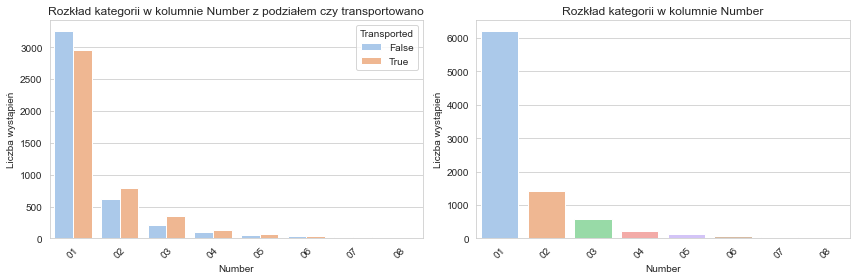

In [71]:
draw_countplot('Number')

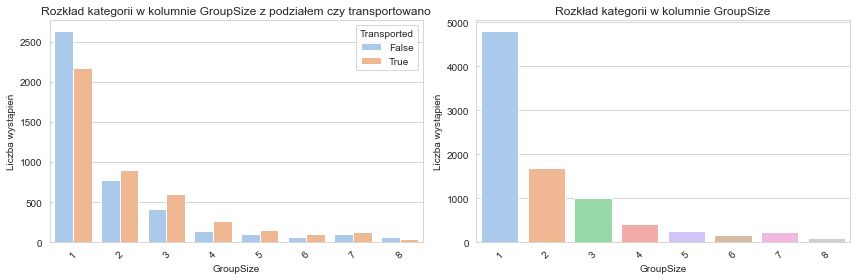

In [72]:
draw_countplot('GroupSize')

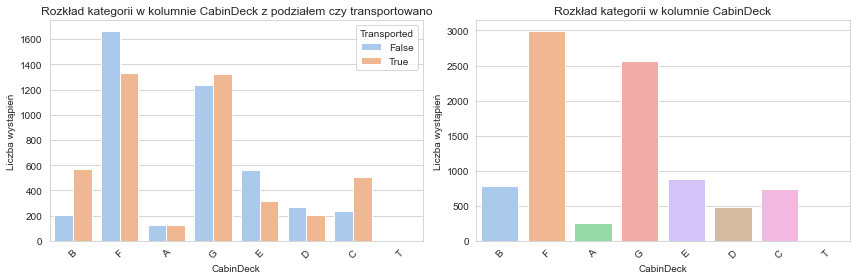

In [73]:
draw_countplot('CabinDeck')

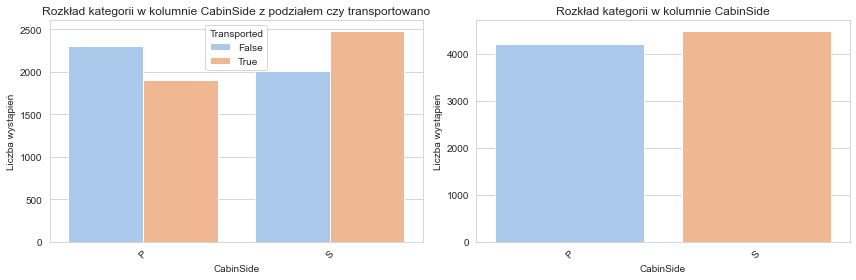

In [74]:
draw_countplot('CabinSide')

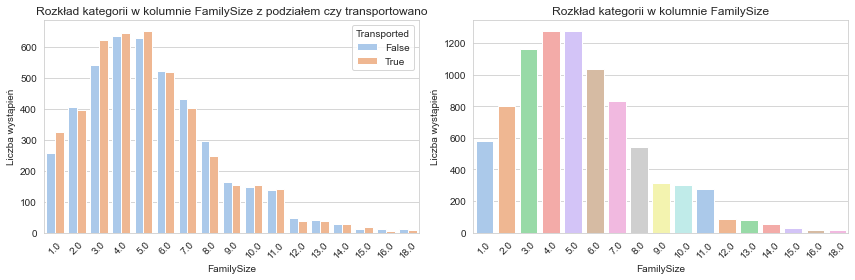

In [75]:
draw_countplot('FamilySize')

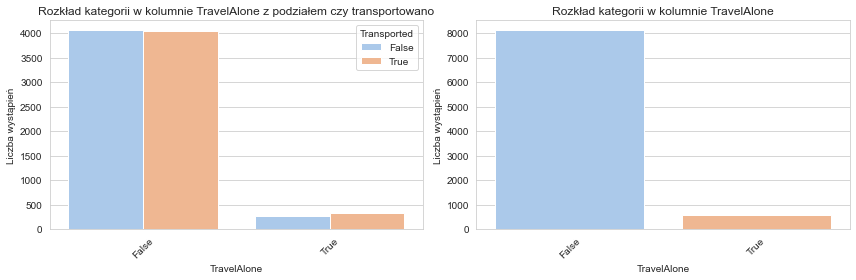

In [76]:
draw_countplot('TravelAlone')

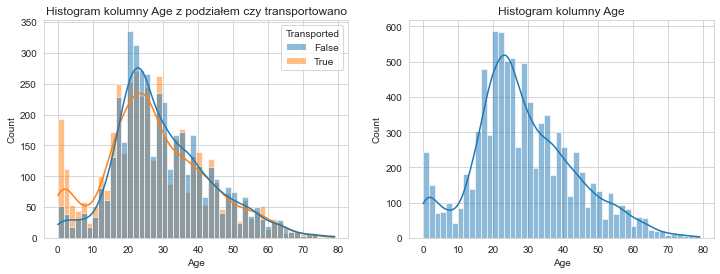

In [77]:
draw_hist('Age')

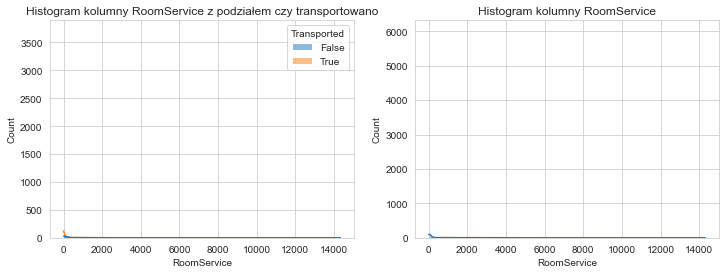

In [78]:
draw_hist('RoomService')

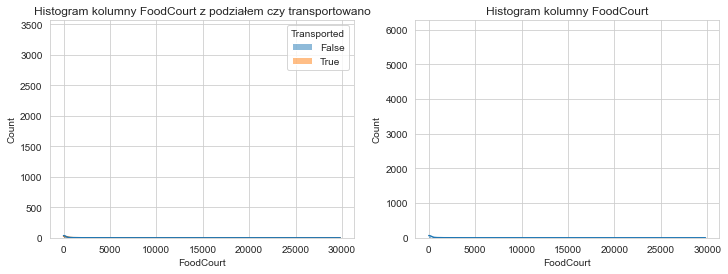

In [79]:
draw_hist('FoodCourt')

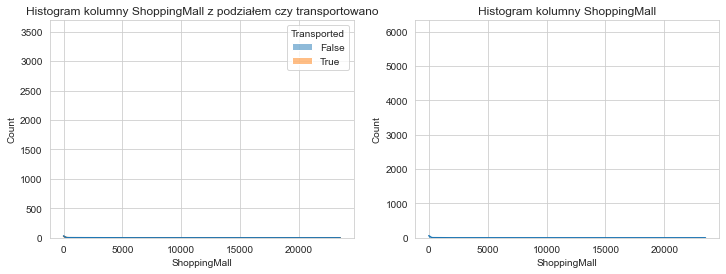

In [80]:
draw_hist('ShoppingMall')

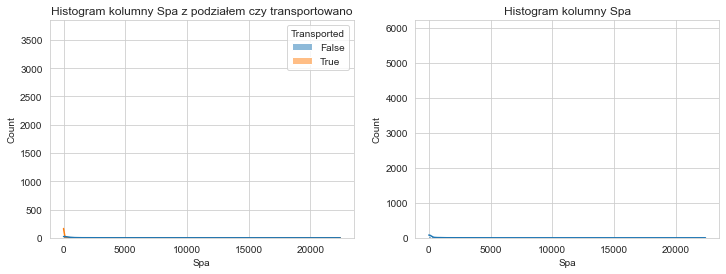

In [81]:
draw_hist('Spa')

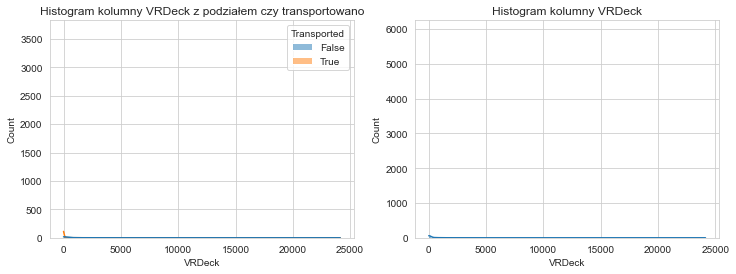

In [82]:
draw_hist('VRDeck')

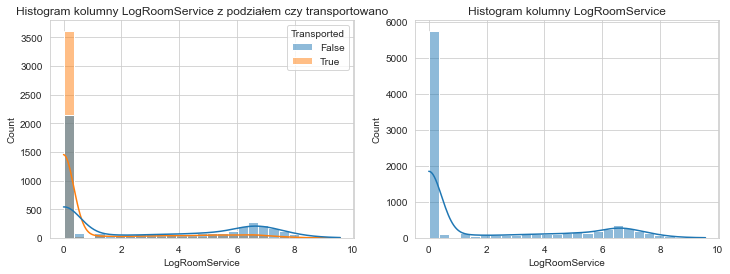

In [83]:
draw_hist('LogRoomService')

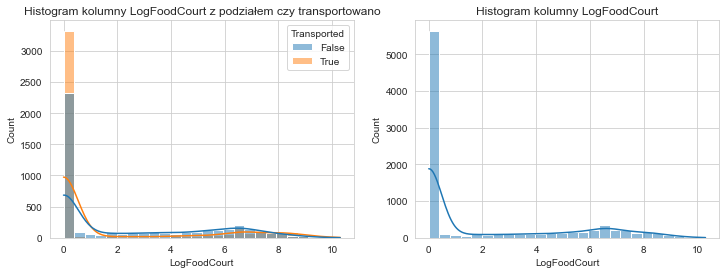

In [84]:
draw_hist('LogFoodCourt')

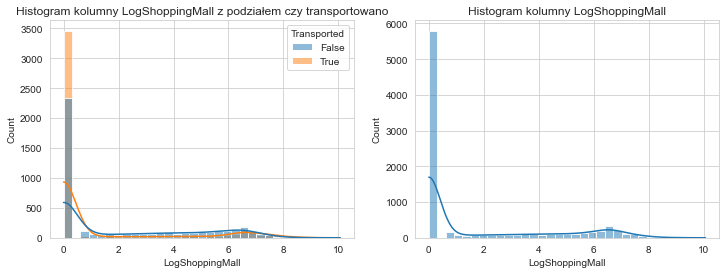

In [85]:
draw_hist('LogShoppingMall')

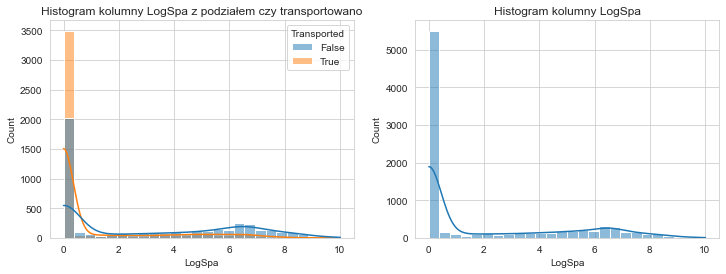

In [86]:
draw_hist('LogSpa')

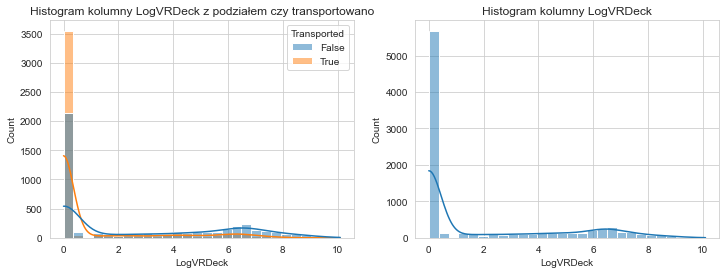

In [87]:
draw_hist('LogVRDeck')

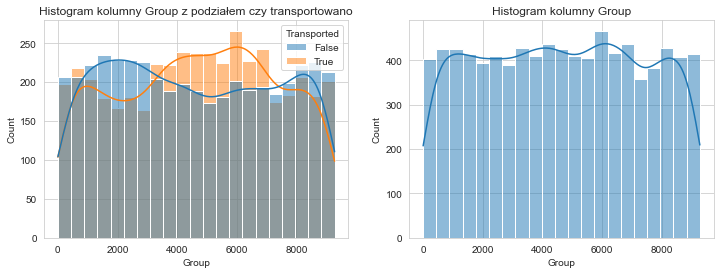

In [88]:
draw_hist('Group')

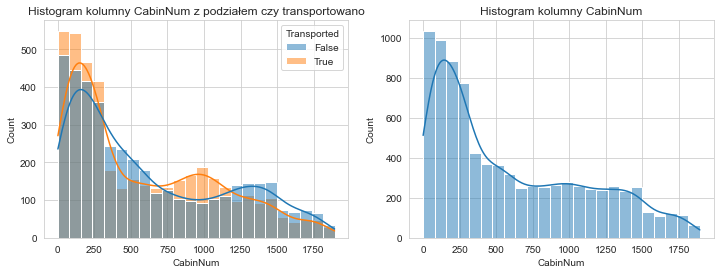

In [89]:
draw_hist('CabinNum')

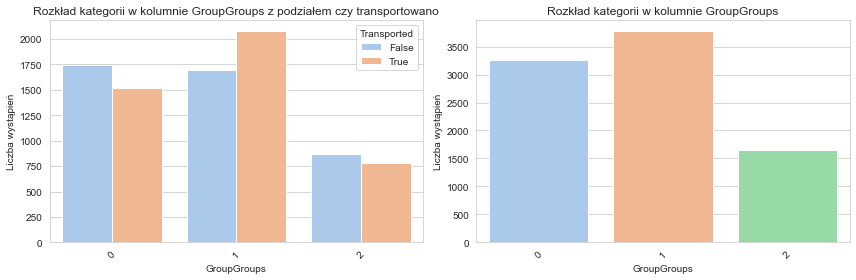

In [90]:
draw_countplot('GroupGroups')

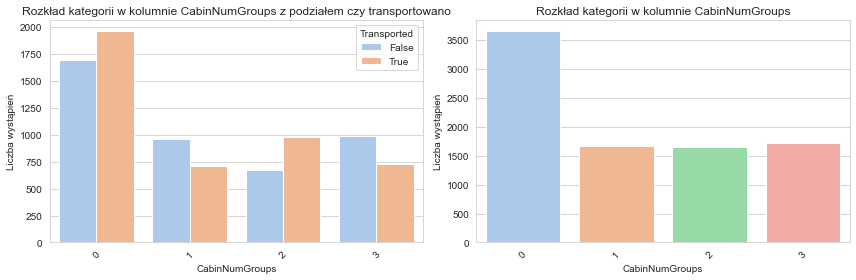

In [91]:
draw_countplot('CabinNumGroups')